In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib as mpl
import shutil
import os
import sys

In [5]:
clinical_ids = np.load('clinical_ids.npy')
print(clinical_ids)

['006' '011' '021' '028' '041' '048' '056' '077' '079' '082' '099' '104'
 '111' '114' '122' '124' '125' '156' '157' '158' '174' '175' '184' '194'
 '210' '216' '225' '229' '232' '233' '236' '237' '240' '243' '248' '254'
 '256' '265' '282' '303' '321' '330' '342' '356' '360' '368' '371' '387'
 '398' '400' '404' '437' '441' '449' '480' '515' '519' '530' '542' '547'
 '551' '556' '557' '564' '609' '620' '621' '623' '634' '646' '661' '671'
 '676' '691' '693' '695' '706' '714' '715' '724' '736' '745' '746' '750'
 '759' '781']


In [6]:
# Remove timeseries if necessary
clinical_ids = np.load('clinical_ids.npy')
for i,n in enumerate(clinical_ids):
    for k in range(1,31):
        for l in range(1,31):
            if os.path.exists(f'/m/nbe/scratch/leap_mcpsych/Aleksi/subs_log/sub-{n}/sub-{n}_K-{k}_L-{l}_timeseries.npy'):
                os.remove(f'/m/nbe/scratch/leap_mcpsych/Aleksi/subs_log/sub-{n}/sub-{n}_K-{k}_L-{l}_timeseries.npy')

In [7]:
control_ids = np.load('control_ids.npy')
clinical_ids = np.load('clinical_ids.npy')
print(clinical_ids.shape)
print(clinical_ids)
'''subject_path = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id}_yeo17_200Parcels_for_fit'
subject = pickle.load(open(subject_path, 'rb'))
sc = subject['connectome'] / np.mean(subject['connectome'])'''

(86,)
['006' '011' '021' '028' '041' '048' '056' '077' '079' '082' '099' '104'
 '111' '114' '122' '124' '125' '156' '157' '158' '174' '175' '184' '194'
 '210' '216' '225' '229' '232' '233' '236' '237' '240' '243' '248' '254'
 '256' '265' '282' '303' '321' '330' '342' '356' '360' '368' '371' '387'
 '398' '400' '404' '437' '441' '449' '480' '515' '519' '530' '542' '547'
 '551' '556' '557' '564' '609' '620' '621' '623' '634' '646' '661' '671'
 '676' '691' '693' '695' '706' '714' '715' '724' '736' '745' '746' '750'
 '759' '781']


"subject_path = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id}_yeo17_200Parcels_for_fit'\nsubject = pickle.load(open(subject_path, 'rb'))\nsc = subject['connectome'] / np.mean(subject['connectome'])"

In [8]:
# Load all connectome with this snippet
for c in clinical_ids:
    subject_path_all = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{c}_yeo17_200Parcels_for_fit'
    all_subjects = pickle.load(open(subject_path_all, 'rb'))
    scs = all_subjects['connectome'] / np.mean(all_subjects['connectome'])

FileNotFoundError: [Errno 2] No such file or directory: '/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON282_yeo17_200Parcels_for_fit'

In [ ]:
networks_nx = []

for connectome_normed in networks:
    network = nx.from_numpy_array(connectome_normed)
    networks_nx.append(network)

In [9]:
id = 330
subject_path_330 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id}_yeo17_200Parcels_for_fit'
subject_330 = pickle.load(open(subject_path_330, 'rb'))
sc_330 = subject_330['connectome'] / np.mean(subject_330['connectome'])

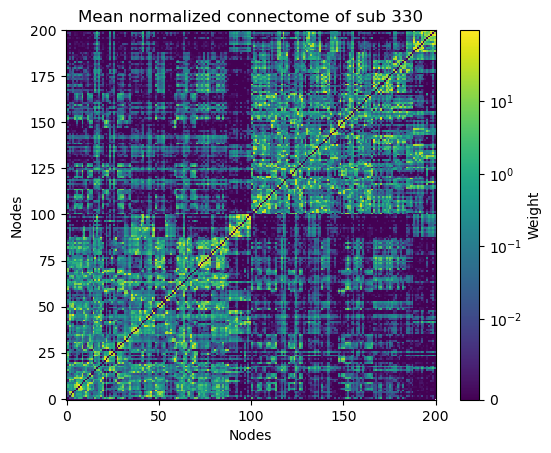

In [10]:
plt.imshow(sc_330, origin = 'lower')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.pcolormesh(sc_330, norm = mpl.colors.SymLogNorm(linthresh=0.01, vmin = np.min(sc_330), vmax = np.max(sc_330)))
plt.title(f'Mean normalized connectome of sub {id}')
plt.colorbar(label = 'Weight')
plt.show()

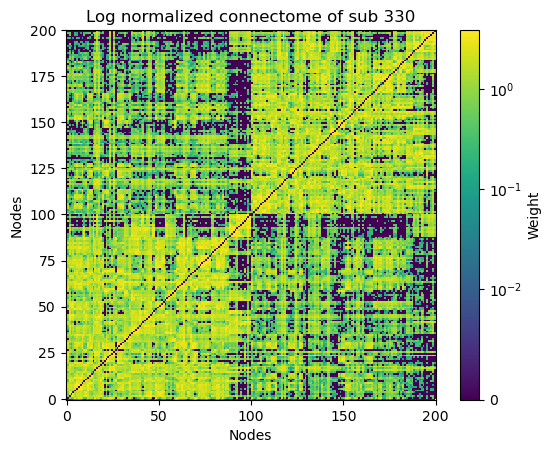

In [11]:
id_330 = 330
subject_path_330 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id_330}_yeo17_200Parcels_for_fit'
subject_330 = pickle.load(open(subject_path_330, 'rb'))
log_sc = np.log2(1 + subject_330['connectome'])
sc_330_log = log_sc / log_sc.mean()
plt.imshow(sc_330_log, origin = 'lower')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.pcolormesh(sc_330_log, norm = mpl.colors.SymLogNorm(linthresh=0.01, vmin = np.min(sc_330_log), vmax = np.max(sc_330_log)))
plt.title(f'Log normalized connectome of sub {id_330}')
plt.colorbar(label = 'Weight')
plt.show()

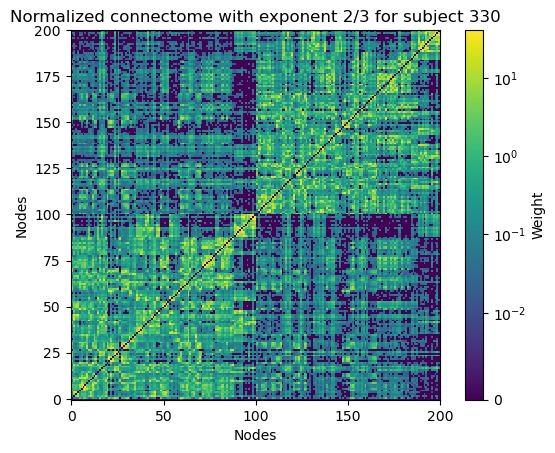

In [12]:
id_330 = 330
subject_path_330 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id_330}_yeo17_200Parcels_for_fit'
subject_330 = pickle.load(open(subject_path_330, 'rb'))
root_sc = subject_330["connectome"]**(2/3)
orig_sc = root_sc / root_sc.mean()
plt.imshow(orig_sc, origin = 'lower')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.pcolormesh(orig_sc, norm = mpl.colors.SymLogNorm(linthresh=0.01, vmin = np.min(orig_sc), vmax = np.max(orig_sc)))
plt.title(f'Normalized connectome with exponent 2/3 for subject {id_330}')
plt.colorbar(label = 'Weight')
plt.show()